In [1]:
import pandas as pd
import numpy as np

In [2]:
df_boston = pd.read_csv("Boston House Prices.csv")
df_boston.describe()

,Rooms,Distance,Value
count,506.000000,506.000000,506.000000
mean,6.284634,3.795043,22.532806
std,0.702617,2.105710,9.197104
min,3.561000,1.129600,5.000000
25%,5.885500,2.100175,17.025000
50%,6.208500,3.207450,21.200000
75%,6.623500,5.188425,25.000000
max,8.780000,12.126500,50.000000


In [3]:
import statsmodels.api as sm
print("Statsmodels version : ", sm.__version__)

Statsmodels version :  0.14.5


<Axes: xlabel='Rooms', ylabel='Value'>

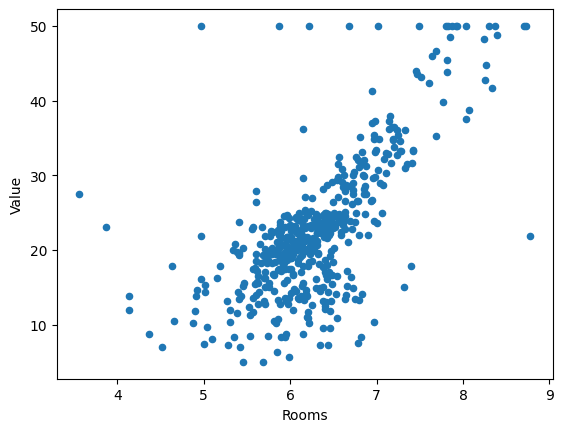

In [4]:
y = df_boston['Value']
x = df_boston['Rooms']
df_boston.plot(kind='scatter', x='Rooms', y='Value')
             

In [5]:
x = sm.add_constant(x)
lm = sm.OLS(y,x).fit()

In [6]:
lm.predict(x)

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
         ...    
501    25.339584
502    21.034286
503    28.825691
504    27.169108
505    20.215096
Length: 506, dtype: float64

In [7]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 11 Nov 2025   Prob (F-statistic):           2.49e-74
Time:                        16:28:46   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
Rooms          9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
y_pred = 9.1021*x['Rooms'] - 34.6706

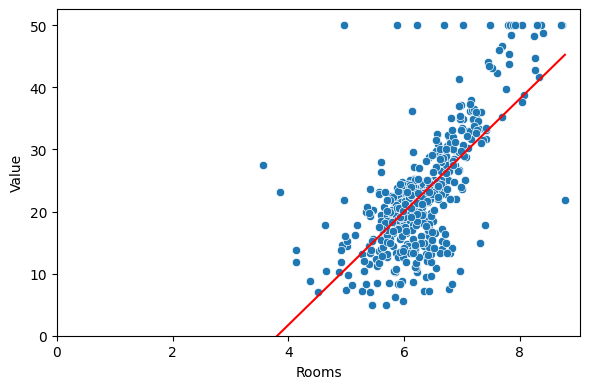

In [9]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4), tight_layout=True)
sns.scatterplot(x=x['Rooms'], y=y)

sns.lineplot(x=x['Rooms'],y=y_pred, color='red')

plt.xlim(0)
plt.ylim(0)
plt.savefig('linear_regression')
plt.show()

In [10]:
y = df_boston['Value']
X = df_boston[['Rooms','Distance']]
X = sm.add_constant(X)
lm = sm.OLS(y, X).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Tue, 11 Nov 2025   Prob (F-statistic):           1.84e-75
Time:                        16:28:48   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6361      2.621    -13.212      0.000     -39.786     -29.486
Rooms          8.8014      0.424     20.780      0.000       7.969       9.634
Distance       0.4888      0.141      3.459      0.001       0.211       0.767
==============================================================================
Omnibus:                      142.807   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              844.520
Skew:                           1.090   Prob(JB):                    4.12e-184
Kurtosis:                       8.942   Cond. No.                         68.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
from sklearn import linear_model
y = df_boston['Value']
X = df_boston[['Rooms','Distance']]

In [12]:
lm = linear_model.LinearRegression()
lm.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
lm.score(X,y)

0.4955246476058477

In [14]:
lm.coef_

array([8.80141183, 0.48884854])

In [15]:
lm.intercept_

np.float64(-34.6360501754733)